   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 49.3 MB/s eta 0:00:00


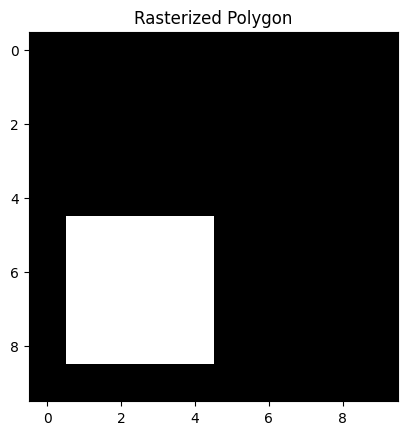

Polygon has been rasterized and saved as 'rasterized_polygon.tif'.


In [7]:
! pip install rasterio
import numpy as np
import rasterio
from shapely.geometry import Polygon, mapping
from rasterio.features import geometry_mask

# Define the polygon coordinates (clockwise or counterclockwise)
polygon_coords = [
    (1, 1),
    (5, 1),
    (5, 5),
    (1, 5)
]

# Create a polygon object using shapely
polygon = Polygon(polygon_coords)

# Define the raster grid dimensions and resolution (pixel size)
raster_width = 10
raster_height = 10
pixel_size = 1  # assuming 1 unit per pixel

# Create an affine transform (identity transform for simplicity)
from rasterio.transform import from_origin
transform = from_origin(0, 10, pixel_size, pixel_size)  # top-left corner at (0, 10)

# Create an empty raster of the same size as the grid
raster = np.zeros((raster_height, raster_width), dtype=np.uint8)

# Create a mask for the polygon in the raster grid
mask = geometry_mask([polygon], transform=transform, invert=True, out_shape=(raster_height, raster_width))

# Apply the mask to the raster (set 1 for pixels inside the polygon)
raster[mask] = 1

# Display the resulting raster (as an image)
import matplotlib.pyplot as plt
plt.imshow(raster, cmap='gray')
plt.title('Rasterized Polygon')
plt.show()

# Optionally, save the raster to a file (GeoTIFF)
with rasterio.open('rasterized_polygon.tif', 'w', driver='GTiff',
                   count=1, dtype='uint8', width=raster_width, height=raster_height,
                   crs='EPSG:4326', transform=transform) as dst:
    dst.write(raster, 1)

print("Polygon has been rasterized and saved as 'rasterized_polygon.tif'.")


In [8]:
raster

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)